In [0]:
!pip install tensorflow==2.0.0-rc1 

In [136]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

import numpy as np
import re

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from google.colab import files

tf.__version__

'2.0.0-rc1'

# Sequence generation with TF2.0

In this notebook we train a simple model with lyrics by Rosalía ().
Next, we generate new song lyrics. 

The dataset used in this toy example is small (3 song only) and the model is simple. 

Feel free to used the model with a larger dataset and add some complexity! :)

In [5]:
# Upload the data
uploaded = files.upload()

Saving rosalia_lyrics.txt to rosalia_lyrics.txt


In [0]:
# Load the data
with open('rosalia_lyrics.txt', 'r') as infile:
    lyrics = infile.read()

In [22]:
# Sanity check
lyrics

" las cosas\nQue las cosas que me dices\nQue las cosas que me dices\nNo salgan por esa puerta\n\n[Pre-Estribillo]\nY átame con tu cabello\nA la esquina de tu cama\nQue aunque el cabello se rompa\nHaré ver que estoy ata'a\nQue aunque el cabello se rompa\nHaré ver que estoy ata'a (Ata'a)\n\n[Estribillo]\nAy, Ali, Ali, Ali, Ali, Ali, Ali, Yali ya\nAy, Ali, Ali, Ali, Ali, Ali, Ali, Yali ya\nAy, Ali, Ali, Ali, Ali, Ali, Ali, Yali ya\n\n[Verso 2]\nDi mi nombre\nPon tu cuerpo contra el mío\nY haz que lo malo sea bueno\nImpuro lo bendeci'o\n\n[Pre-Estribillo]\nY hazme rezar sobre tu cuerpo\nY en la esquina de tu cama\nY en el último momento\nDime mi nombre a la cara\nY en el último momento\nDime mi nombre a la cara\n\n[Estribillo]\n(Ay, Ali, Ali, Ali, Ali, Ali, Ali, Yali ya)\n(Ay, Ali, Ali, Ali, Ali, Ali, Ali, Yali ya)\n(Ay, Ali, Ali, Ali, Ali, Ali, Ali, Yali ya)\n(Ay, Ali, Ali, Ali, Ali, Ali, Ali, Yali ya)\nAy, Ali, Ali, Ali, Ali, Ali, Ali, Yali ya\nAy, Ali, Ali, Ali, Ali, Ali, Ali, Yali ya\n

In [0]:
# Clean the data - remove verse, chorus, etc. tags
lyrics = re.sub('\[.+\]', '', lyrics)
lyrics = re.sub('\(.+\)', '', lyrics)

In [0]:
# Instantiate the tokenizer
tokenizer = Tokenizer()

In [0]:
# Get the corpus
corpus = lyrics.lower().split('\n')

In [0]:
# Remove empty lines
corpus = [line for line in corpus if len(line) != 0]

In [0]:
# Fit the tokenizer
tokenizer.fit_on_texts(corpus)

In [0]:
# Adding one to consider out-of-vocab words
n_words = len(tokenizer.word_index) + 1

In [0]:
# turn the corpus into the training data
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range (1, len(token_list)):
        n_gram_seq = token_list[:i + 1]
        input_sequences.append(n_gram_seq)

In [0]:
# Find the length of the longest seq in the corpus
max_seq_len = max([len(x) for x in input_sequences])

In [69]:
max_seq_len

15

In [0]:
# Pad sequences
in_seqs = pad_sequences(input_sequences, 
                        maxlen  = max_seq_len,
                        padding = 'pre')

In [75]:
# A quick sanity check
for i, seq in enumerate(in_seqs):
    if i < 10:
        print(seq)

[  0   0   0   0   0   0   0   0   0   0   0   0   0  32 107]
[  0   0   0   0   0   0   0   0   0   0   0   0  32 107  20]
[  0   0   0   0   0   0   0   0   0   0   0  32 107  20 108]
[  0   0   0   0   0   0   0   0   0   0  32 107  20 108  62]
[  0   0   0   0   0   0   0   0   0  32 107  20 108  62  81]
[  0   0   0   0   0   0   0   0   0   0   0   0   0  11 109]
[  0   0   0   0   0   0   0   0   0   0   0   0  11 109  17]
[  0   0   0   0   0   0   0   0   0   0   0  11 109  17 110]
[  0   0   0   0   0   0   0   0   0   0  11 109  17 110  62]
[  0   0   0   0   0   0   0   0   0  11 109  17 110  62 111]


In [0]:
# Data-label split
X = in_seqs[:, :-1]
y = in_seqs[:, -1]

In [0]:
# One-hot encode the labels
y = tf.keras.utils.to_categorical(y, num_classes = n_words)

In [0]:
# Build a generative model
model = Sequential()

model.add(Embedding(n_words, 64, 
                    input_length = max_seq_len - 1))

model.add(Bidirectional(LSTM(20)))

model.add(Dense(n_words, activation = 'softmax'))

model.compile(loss      = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics   = ['accuracy'])

In [0]:
hist = model.fit(X, y, epochs = 500, verbose = 1)

In [0]:
def plot_metrics(history):
    plt.plot(history.history['loss'], label = 'Loss')
    plt.plot(history.history['accuracy'], label = 'Acc')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

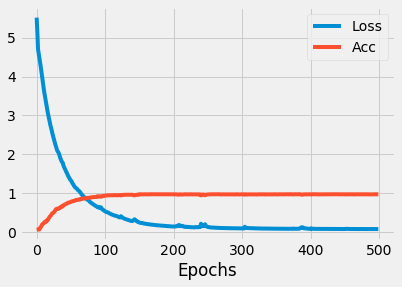

In [137]:
plot_metrics(hist)

In [0]:
# Set params
seed = "Cabello"
next_words = 100

In [135]:
# Generate a new seq
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], 
                               maxlen  = max_seq_len - 1,
                               padding = 'pre')
    predicted = model.predict_classes(token_list,
                                      verbose = 0)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed += " " + output_word
print(seed)

Cabello que estoy andando por un figura a en clavá' volver a pensarte pensarte guantera todos mi manita del escalera luna sepultura calle mirá' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal mu' mal
